In [1]:
from F_Slices_Functions import *
from PIL import Image, ImageOps # load and show an image with Pillow
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.stats import beta # Distribution type
from sklearn import preprocessing # Normalization

Original Image Shape: (398, 334, 4)
Gray Original Image Shape: (398, 334)
Gray Image Resized Shape:  (39, 33)
Gray Image Resized Flattend Shape:  (1287,)
95th percentile of arr :  37.0
Original Image Shape: (53, 62, 4)
Gray Original Image Shape: (53, 62)
Gray Image Resized Shape:  (5, 6)
Gray Image Resized Flattend Shape:  (30,)
Mean Original: 21.38927738927739
SD Original: 8.166582085474756
Mean Control: 21.38927738927739
SD Control: 8.166582085474756
Mean Original without Edges: 42.69565217391305
SD Original without Edges: 3.539853218221519
Mean Original without Control and Edges: 42.69565217391305
SD Original without Control and Edges: 3.539853218221519


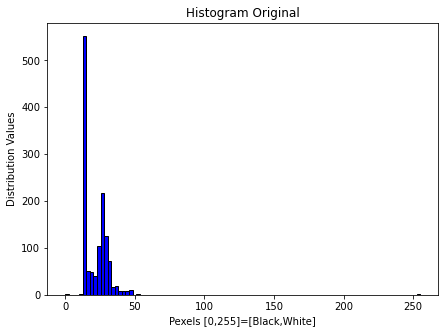

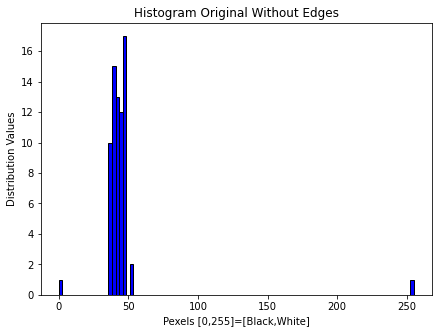

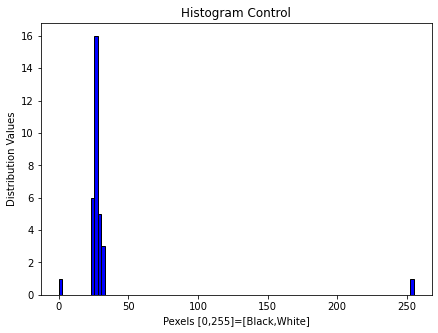

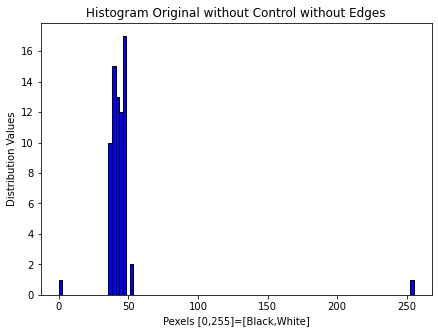

Histogram Shape Original Image with 100 Bins: (1000,)


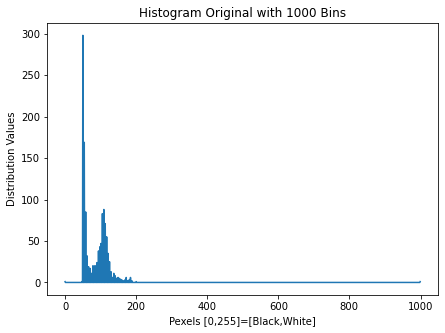

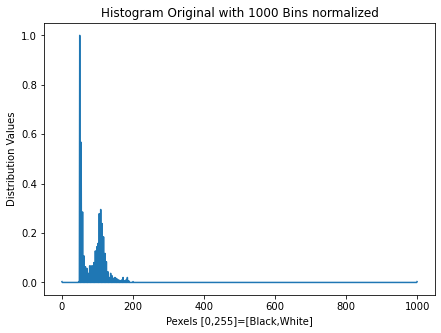

Histogram Shape Original Image without Edges with 100 Bins: (1000,)


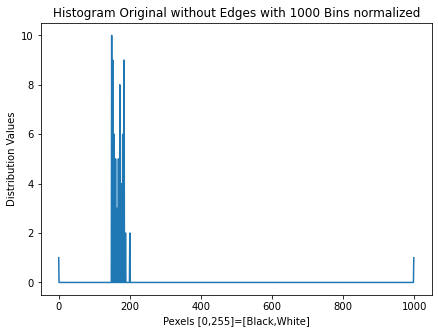

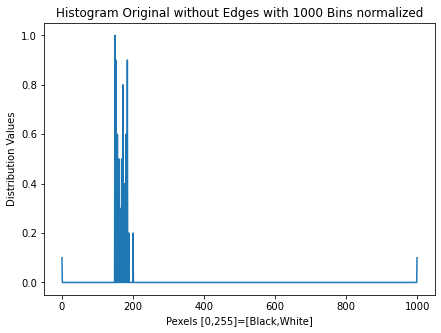

Histogram Shape Original Image without Edges with 100 Bins: (1000,)


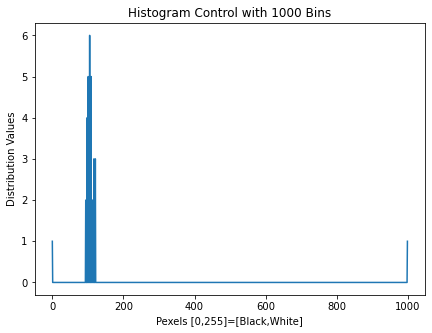

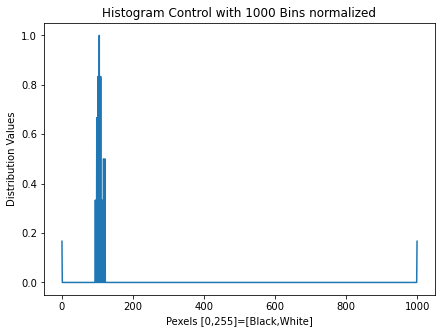

Histogram Shape Original Image without Edges and Control with 100 Bins: (1000,)


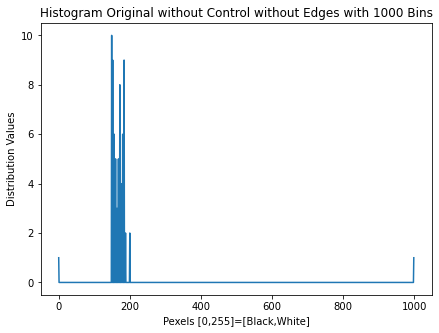

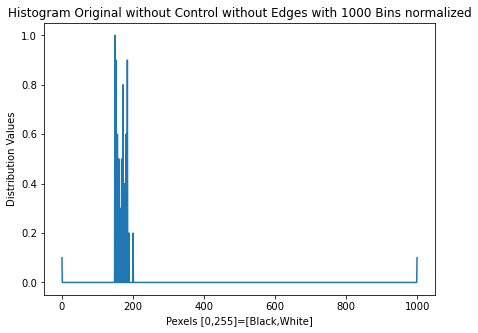

In [3]:
img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-6.png", 10)
img_flattened_without_edges = Remove_From_Image_Edges_Background(img,10,95)
img_control, img_flattened_control = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-6-control.png", 10)
img_flattened_without_edges_without_control = Delete_Values_Array_From_Another(img_flattened_without_edges,img_flattened_control)

img_mean, img_std = Calculate_Mean_SD(img_flattened,"Original")
img_mean_control, img_std_control = Calculate_Mean_SD(img_flattened,"Control")
img_mean_without_control, img_std_without_control = Calculate_Mean_SD(img_flattened_without_edges,"Original without Edges")
img_mean_without_control_without_edges, img_mean_without_control_without_edges = Calculate_Mean_SD(img_flattened_without_edges_without_control,"Original without Control and Edges")

img_flattened = Add_Black_White_Limits(img_flattened)
img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)
img_flattened_control = Add_Black_White_Limits(img_flattened_control)
img_flattened_without_edges_without_control = Add_Black_White_Limits(img_flattened_without_edges_without_control)

Plot_Basic_Histogram(img_flattened,"Original","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_without_edges,"Original Without Edges","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_control,"Control","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_without_edges_without_control,"Original without Control without Edges","Distribution Values","Pexels [0,255]=[Black,White]")


#------------------------------------------------------------------- Histograms & Normalization
img_flattened_hist, _ = np.histogram(img_flattened, bins=1000)
print("Histogram Shape Original Image with 100 Bins:",img_flattened_hist.shape)
Plot_Basic(img_flattened_hist,"Histogram Original with 1000 Bins","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_hist_normalized = Normalization_of_List(img_flattened_hist)
Plot_Basic(img_flattened_hist_normalized,"Histogram Original with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=1000)
print("Histogram Shape Original Image without Edges with 100 Bins:",img_flattened_without_edges_hist.shape)
Plot_Basic(img_flattened_without_edges_hist,"Histogram Original without Edges with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
Plot_Basic(img_flattened_without_edges_hist_normalized,"Histogram Original without Edges with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

img_flattened_control_hist, _ = np.histogram(img_flattened_control, bins=1000)
print("Histogram Shape Original Image without Edges with 100 Bins:",img_flattened_control_hist.shape)
Plot_Basic(img_flattened_control_hist,"Histogram Control with 1000 Bins","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_control_hist_normalized = Normalization_of_List(img_flattened_control_hist)
Plot_Basic(img_flattened_control_hist_normalized,"Histogram Control with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

img_flattened_without_edges_without_control_hist, _ = np.histogram(img_flattened_without_edges_without_control, bins=1000)
print("Histogram Shape Original Image without Edges and Control with 100 Bins:",img_flattened_without_edges_without_control_hist.shape)
Plot_Basic(img_flattened_without_edges_without_control_hist,"Histogram Original without Control without Edges with 1000 Bins","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_without_edges_without_control_hist_normalized = Normalization_of_List(img_flattened_without_edges_without_control_hist)
Plot_Basic(img_flattened_without_edges_without_control_hist_normalized,"Histogram Original without Control without Edges with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- Original Normalized 

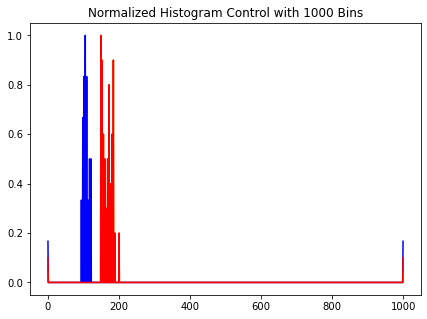

In [5]:
# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(img_flattened_without_edges_hist_normalized, 'orange')
plt.plot(img_flattened_control_hist_normalized, 'blue')
plt.plot(img_flattened_without_edges_without_control_hist_normalized, 'red')
plt.title("Normalized Histogram Control with 1000 Bins")
plt.show()